# Melanoma Classifier EDA
***
## Import Packages

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
import os
from os.path import join

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras import models, regularizers, layers, optimizers, losses, metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
# from keras.applications import ResNet50


## Create Paths for train, test, and valid

In [29]:
PATH = "../data/DermMel/"
print(os.listdir(PATH))

['valid', 'test', 'train']


## Check the Content of the Directories

In [28]:
PATHtrain = PATH + 'train/'
print(len(os.listdir(PATHtrain)), " TRAIN Directories of photos")
Labels = os.listdir(PATHtrain)
sig = 0
for label in sorted(Labels):
    print(label,len(os.listdir(PATHtrain + label +'/')))
    sig = sig + len(os.listdir(PATHtrain + label +'/'))

print("Total TRAIN photos ", sig)
print("_"*50)

PATHtest = PATH + 'test/'
print(len(os.listdir(PATHtest)), " TEST Directories of photos")
Labels = os.listdir(PATHtest)
sig = 0
for label in sorted(Labels):
    print(label,len(os.listdir(PATHtest + label +'/')))
    sig = sig + len(os.listdir(PATHtest + label +'/'))

print("Total Testing photos ", sig)
print("_"*50)

PATHvalid = PATH + 'valid/'
print(len(os.listdir(PATHvalid)), " VALID Directories of photos")
Labels = os.listdir(PATHvalid)
sig = 0
for label in sorted(Labels):
    print(label,len(os.listdir(PATHvalid + label +'/')))
    sig = sig + len(os.listdir(PATHvalid + label +'/'))

print("Total Validation photos ", sig)
print("_"*50)


2  TRAIN Directories of photos
Melanoma 5342
NotMelanoma 5341
Total TRAIN photos  10683
__________________________________________________
2  TEST Directories of photos
Melanoma 1781
NotMelanoma 1780
Total Testing photos  3561
__________________________________________________
2  VALID Directories of photos
Melanoma 1781
NotMelanoma 1782
Total Validation photos  3563
__________________________________________________


## Create a Dictionary of Counts for train, test and valid Melanoma and NOT Melanoma images

In [33]:
photos_dict = {
    'train_mel': 5341,
    'train_not_mel': 5341,
    'total_train': 10_682,
    'test_mel': 1781,
    'test_not_mel': 1780,
    'total_test': 3561,
    'valid_mel': 1781,
    'valid_not_mel': 1781,
    'total_valid': 3562,
    }

In [34]:
photos_dict

{'train_mel': 5341,
 'train_not_mel': 5341,
 'total_train': 10682,
 'test_mel': 1781,
 'test_not_mel': 1780,
 'total_test': 3561,
 'valid_mel': 1781,
 'valid_not_mel': 1781,
 'total_valid': 3562}

## Plot a Horizontal Bar Plot to Visualize Counts

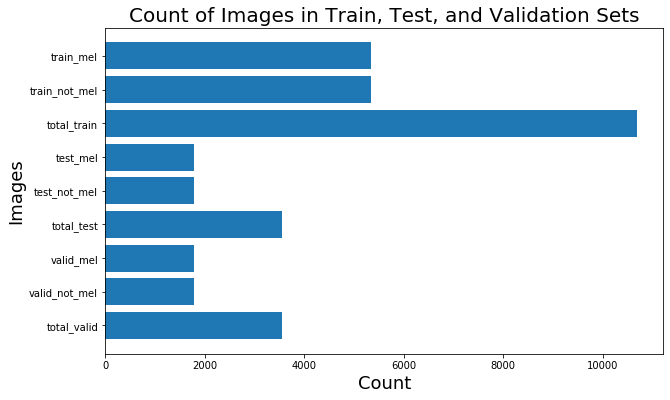

In [45]:
plt.figure(figsize = (10,6))
plt.title('Count of Images in Train, Test, and Validation Sets',  fontsize=20)
plt.barh(range(len(photos_dict)), list(photos_dict.values()), align='center')
plt.gca().invert_yaxis()
plt.yticks(range(len(photos_dict)), list(photos_dict.keys()), rotation= 0)
plt.xlabel('Count', fontsize=18)
plt.ylabel('Images', fontsize=18)
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

Sample sizes appear substantial for train, validation, and test sets.

## Examine a Sample of Melanoma Images With Their Labels

TRAIN  Melanoma  photo number  18


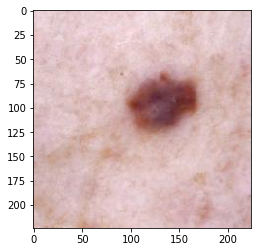

TEST  Melanoma  photo number  18


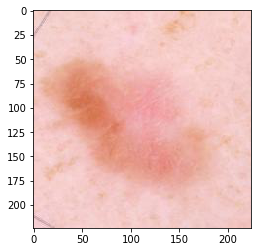

VALID  Melanoma  photo number  18


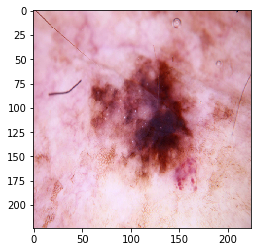

In [46]:
TestNum = 18
diag = 'Melanoma'

image_dir = PATHtrain +'/'+diag+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("TRAIN ",diag," photo number ", TestNum)
plt.show()

image_dir = PATHtest +'/'+diag+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("TEST ",diag," photo number ", TestNum)
plt.show()

image_dir = PATHvalid +'/'+diag+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("VALID ",diag," photo number ", TestNum)
plt.show()

## Examine a Sample of NOT Melanoma Images With Their Labels

TRAIN  NotMelanoma  photo number  8


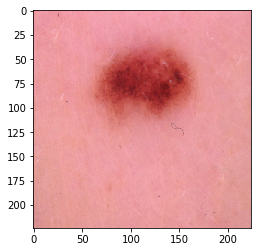

TEST  NotMelanoma  photo number  8


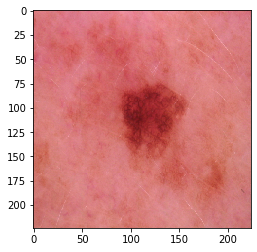

VALID  NotMelanoma  photo number  8


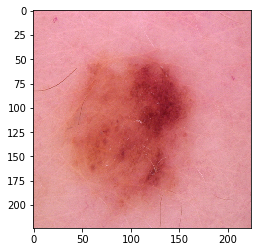

In [43]:
# Check the photos and their labels 

TestNum = 8
diag = 'NotMelanoma'

image_dir = PATHtrain +'/'+diag+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("TRAIN ",diag," photo number ", TestNum)
plt.show()

image_dir = PATHtest +'/'+diag+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("TEST ",diag," photo number ", TestNum)
plt.show()

image_dir = PATHvalid +'/'+diag+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("VALID ",diag," photo number ", TestNum)
plt.show()